# Future Work 

The next steps to improve Firelook will involve integrating 'Fire danger indices historical data from the Copernicus Emergency Management Service' into our frontend for the study area.
The fire danger metrics available are sourced from a comprehensive dataset established by the Copernicus Emergency Management Service to support the European Forest Fire Information System (EFFIS). This system encompasses fire danger indices derived from three distinct models developed in Canada, the United States, and Australia. Within this dataset, the fire danger indices are calculated based on historical weather forecast simulations obtained from the ECMWF ERA5 reanalysis. You can find the data in the next link [Fire danger indices historical data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-fire-historical-v1?tab=overview)

## The Case Event

We gathered various fire danger indices for October 8, 2023, covering the Colombian region, with the aim of comparing their outcomes with the active fires on the same day. Below, we present these indices spatially, along with an explanation of their significance and potential applications for wildfire mitigation and prevention.

# U.S. Forest Service National Fire-Danger Rating System

In [18]:
import xarray as xr
ds = xr.open_dataset('/Users/mooveit-tati/Documents/Fire/geoappsys/ERA5_Data/fire_us_indexs.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 65, longitude: 45)
Coordinates:
    time       datetime64[ns] ...
    surface    float64 ...
  * latitude   (latitude) float64 13.0 12.75 12.5 12.25 ... -2.5 -2.75 -3.0
  * longitude  (longitude) float64 282.0 282.2 282.5 282.8 ... 292.5 292.8 293.0
Data variables:
    buinfdr    (latitude, longitude) float32 ...
    ercnfdr    (latitude, longitude) float32 ...
    icnfdr     (latitude, longitude) float32 ...
    scnfdr     (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-08T15:26 GRIB to CDM+CF via cfgrib-0.9.9...

In [19]:
variable1 = ds['buinfdr']
variable2 = ds['ercnfdr']
variable3 = ds['icnfdr']
variable4 = ds['scnfdr']
latitude = ds['latitude']
longitude = ds['longitude']

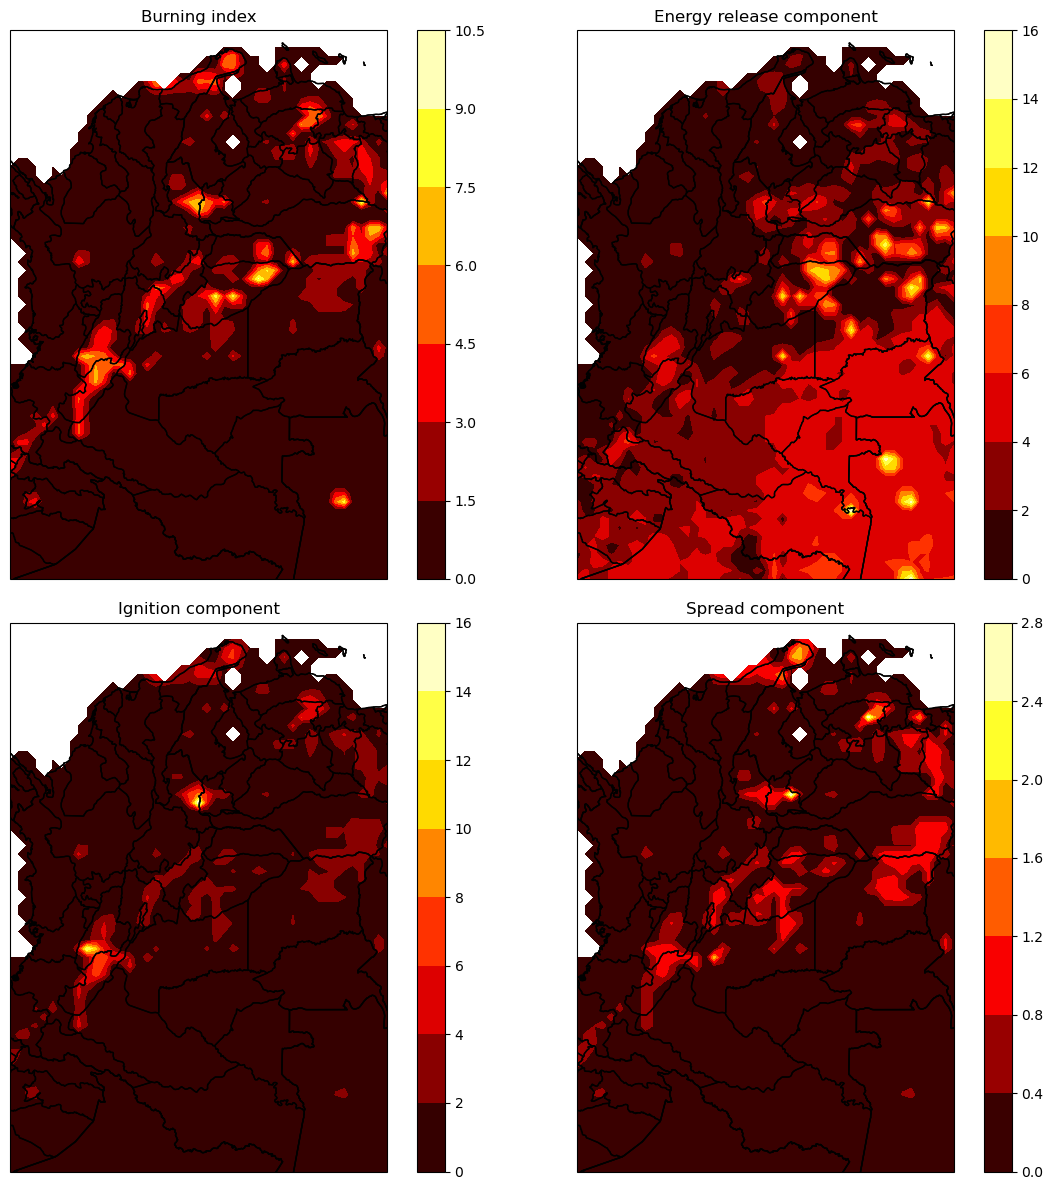

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})


variables = [variable1, variable2, variable3, variable4]


titulos = ['Burning index', 'Energy release component', 'Ignition component', 'Spread component']


for i, ax in enumerate(axs.flatten()):
   
    im = ax.contourf(longitude, latitude, variables[i], transform=ccrs.PlateCarree(), cmap='hot')

 
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.STATES)

    
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    #cbar.set_label('Variable Units')


    ax.set_title(titulos[i])

plt.tight_layout()

plt.show()

* The Burning Index measures the difficulty of controlling a fire. It is derived from a combination of Spread component (how fast it will spread) and Energy release component (how much energy will be produced).

* The Energy release component is a number related to the available energy (British Thermal Unit) per unit area (square foot) within the flaming front at the head of a fire. Daily variations in Energy release component are due to changes in moisture content of the various fuels present, both live and dead.

* The Ignition component measures the probability a firebrand will require suppression action. Since it is expressed as a probability, it ranges on a scale of 0 to 100.

* The Spread component is a measure of the spead at which a headfire would spread. The spread component is numerically equal to the theoretical ideal rate of spread expressed in feet-per-minute however is considered as a dimensionless variable. The Spread component is expressed on an open-ended scale; thus it has no upper limit.

# Canadian Forest Service Fire Weather Index Rating System

In [21]:
ds_1 = xr.open_dataset('ERA5_Data/canadian_fire.nc')
ds_1

<xarray.Dataset>
Dimensions:    (latitude: 65, longitude: 45)
Coordinates:
    time       datetime64[ns] ...
    surface    float64 ...
  * latitude   (latitude) float64 13.0 12.75 12.5 12.25 ... -2.5 -2.75 -3.0
  * longitude  (longitude) float64 282.0 282.2 282.5 282.8 ... 292.5 292.8 293.0
Data variables:
    drtcode    (latitude, longitude) float32 ...
    dufmcode   (latitude, longitude) float32 ...
    fdsrte     (latitude, longitude) float32 ...
    fwinx      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-08T16:02 GRIB to CDM+CF via cfgrib-0.9.9...

In [22]:
variable1 = ds_1['drtcode']
variable2 = ds_1['dufmcode']
variable3 = ds_1['fdsrte']
variable4 = ds_1['fwinx']
latitude = ds_1['latitude']
longitude = ds_1['longitude']

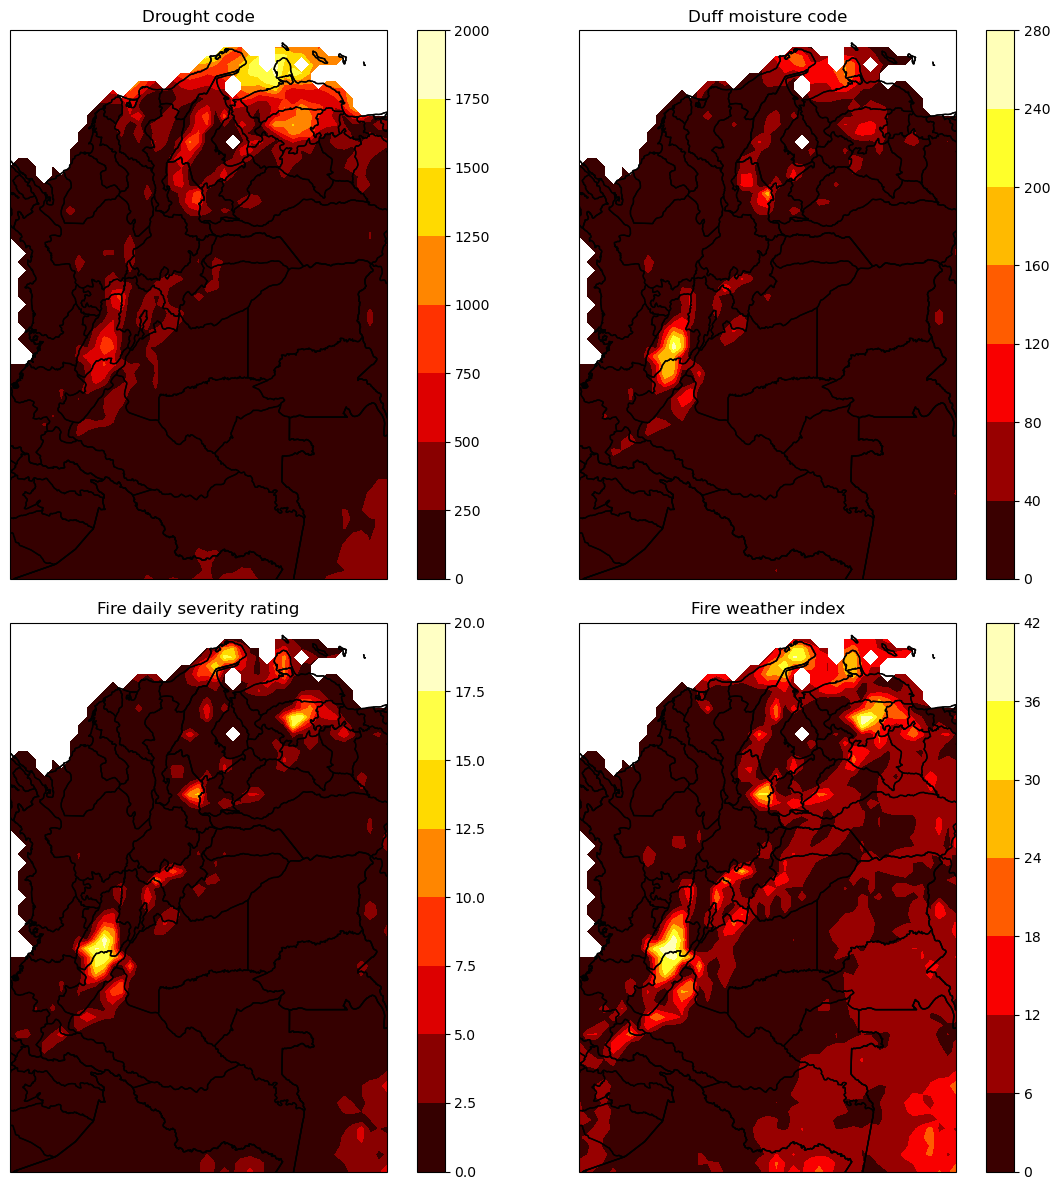

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})


variables = [variable1, variable2, variable3, variable4]


titulos = ['Drought code', 'Duff moisture code', 'Fire daily severity rating', 'Fire weather index']


for i, ax in enumerate(axs.flatten()):
   
    im = ax.contourf(longitude, latitude, variables[i], transform=ccrs.PlateCarree(), cmap='hot')

 
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.STATES)

    
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    #cbar.set_label('Variable Units')


    ax.set_title(titulos[i])

plt.tight_layout()

plt.show()

* The Drought code is an indicator of the moisture content in deep compact organic layers. This code represents a fuel layer at approximately 10-20 cm deep. The Drought code fuels have a very slow drying rate, with a time lag of 52 days. The Drought code scale is open-ended, although the maximum value is about 800.

* The Duff moisture code is an indicatore of the moisture content in loosely-compacted organic layers of moderate depth. It is representative of the duff layer that is 5-10 cm deep. Duff moisture code fuels are affected by rain, temperature and relative humidity

* Numeric rating of the difficulty of controlling fires. It is an exponential transformation of the Fire weather index and more accurately reflects the expected efforts required for fire suppression as it increases exponentially as the Fire weather index is above a certain value.

* The Fire weather index is a combination of Initial spread index and Build-up index, and is a numerical rating of the potential frontal fire intensity. In effect, it indicates fire intensity by combining the rate of fire spread with the amount of fuel being consumed. 

In [30]:
serie = xr.open_dataset('/Users/mooveit-tati/Documents/Fire/geoappsys/ERA5_Data/fire_danger.nc')
serie

<xarray.Dataset>
Dimensions:    (time: 368, latitude: 10, longitude: 6)
Coordinates:
  * time       (time) datetime64[ns] 2022-10-01T12:00:00 ... 2023-10-03T12:00:00
    surface    float64 ...
  * latitude   (latitude) float64 5.12 4.87 4.62 4.37 ... 3.62 3.37 3.12 2.87
  * longitude  (longitude) float64 284.2 284.5 284.7 285.0 285.2 285.5
Data variables:
    fdimrk     (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-08T16:57 GRIB to CDM+CF via cfgrib-0.9.9...

In [36]:
fire_danger = serie.fdimrk

In [37]:
fdimrk_mean = fire_danger[1:(2*365)].mean(dim = ('longitude', 'latitude'))

Text(0.5, 0, 'Time')

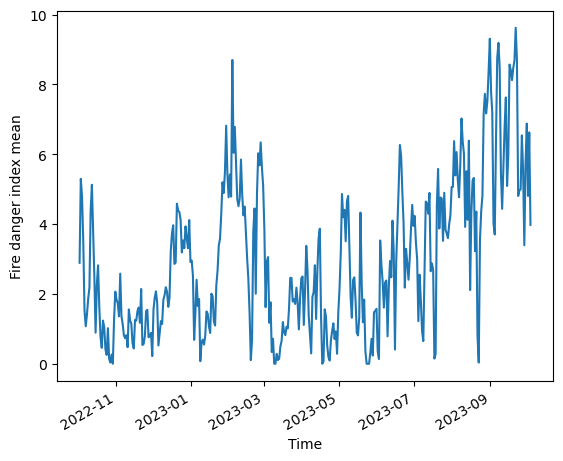

In [43]:

fdimrk_mean.plot()
plt.title("")
plt.ylabel("Fire danger index mean")
plt.xlabel("Time")